In [2]:
import sys
sys.path.insert(0, r'../../../quetzal')

import pandas as pd
from quetzal.model import stepmodel, model
%matplotlib inline

SQLalchemy is not installed. No support for SQL output.


In [3]:
training_folder = '../../'

In [4]:
sm = stepmodel.read_zip(training_folder + 'model/preparation/road.zip')

read_hdf: 100%|████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 34.79it/s]


In [16]:
sandbox = stepmodel.read_zip(training_folder + 'model/preparation/sandbox.zip')
sandbox = sandbox.change_epsg(epsg=3857, coordinates_unit='meter')
sm.links = sandbox.links
sm.nodes = sandbox.nodes

Reprojecting model from epsg 2154 to epsg 3857: 100%|██████████████████████████████████| 33/33 [00:03<00:00,  9.45it/s]

could not change epsg for the following attributes: 
['jsons']


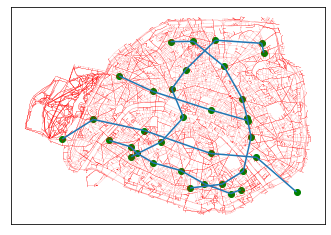

In [18]:
sm.plot('links', ax=sm.plot('nodes', color='green', ax=sm.plot('road_links', color='red', linewidth=0.1)))

# Networkcaster
à faire sur un réseau propre, avant l'agrégation

In [19]:
sm.integrity_test_all(errors='ignore', verbose=True)

0it [00:00, ?it/s]

passed: integrity_test_circular_lines
passed: integrity_test_collision


21222it [00:01, 15378.09it/s]


passed: integrity_test_dead_ends
passed: integrity_test_isolated_roads
passed: integrity_test_nodeset_consistency


21222it [00:05, 4193.19it/s]


passed: integrity_test_road_network
passed: integrity_test_road_nodeset_consistency
failed: integrity_test_sequences


In [20]:
sm.preparation_cast_network(
    nearest_method='nodes',
    n_neighbors_centroid=10, 
    n_neighbors=5
)

1: 100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.27it/s]


In [21]:
sm.to_zip(
    training_folder + 'model/preparation/sandbox_networkcasted.zip'
) 

to_hdf(new file): 100%|████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 14.06it/s]


could not save attribute: missing_nodes
could not save attribute: orphan_nodes
could not save attribute: missing_road_nodes
could not save attribute: networkcaster


In [22]:
sm.analysis_lines()

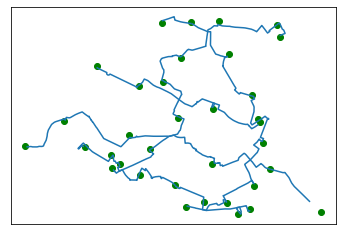

In [23]:
sm.plot('links', ax=sm.plot('nodes', color='green'))